In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

In [3]:
# Construction of model
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(26, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

In [4]:
#Compiling The CNN
model.compile(
              optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [5]:
#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set = train_datagen.flow_from_directory(
        'mydata/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 45500 images belonging to 26 classes.


In [8]:
test_set = test_datagen.flow_from_directory(
        'mydata/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 6500 images belonging to 26 classes.


In [9]:
history = model.fit(
        training_set,
        steps_per_epoch=1421,
        epochs=15,
        validation_data = test_set,
        validation_steps = 203
      )

Epoch 1/15
1421/1421 [==============================] - 1081s 761ms/step - loss: 0.2903 - accuracy: 0.9061 - val_loss: 0.2156 - val_accuracy: 0.9509
Epoch 2/15
1421/1421 [==============================] - 482s 339ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0809 - val_accuracy: 0.9784
Epoch 3/15
1421/1421 [==============================] - 183s 129ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0896 - val_accuracy: 0.9897
Epoch 4/15
1421/1421 [==============================] - 184s 129ms/step - loss: 0.0286 - accuracy: 0.9917 - val_loss: 0.0517 - val_accuracy: 0.9895
Epoch 5/15
1421/1421 [==============================] - 184s 130ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0235 - val_accuracy: 0.9934
Epoch 6/15
1421/1421 [==============================] - 181s 127ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0812 - val_accuracy: 0.9869
Epoch 7/15
1421/1421 [==============================] - 193s 136ms/step - loss: 0.0159 - accuracy: 0.9955 - val

In [10]:
#Saving the model
import h5py
model.save('Trained_cnn_model.h5')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

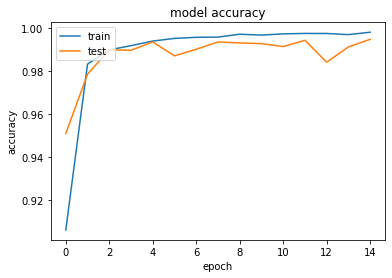

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

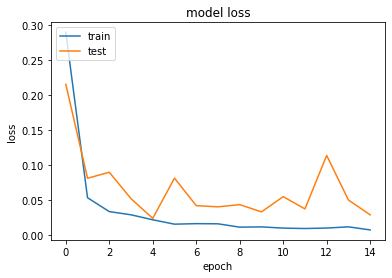

In [13]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
metrics = pd.DataFrame(history.history)

In [15]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.290285,0.906132,0.215631,0.950893
1,0.053008,0.983109,0.080947,0.978448
2,0.033149,0.989707,0.089564,0.989686
3,0.028553,0.991664,0.051706,0.989532
4,0.021399,0.993798,0.023463,0.993381
5,0.015126,0.995029,0.081154,0.986915
6,0.015872,0.995535,0.041696,0.989994
7,0.015635,0.995645,0.039971,0.993381
8,0.010820,0.996965,0.043128,0.992919
9,0.011228,0.996569,0.032731,0.992611


In [16]:
test_loss,test_acc=model.evaluate(test_set)

204/204 [==============================] - 5s 22ms/step - loss: 0.0285 - accuracy: 0.9946


In [17]:
test_acc

0.994615375995636